In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
salary = pd.read_csv("/content/SalaryData_Train(1).csv")
salary_test = pd.read_csv('/content/SalaryData_Test(1).csv')
salary.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
salary.shape

(30161, 14)

In [ ]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [ ]:
salary.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
salary.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [ ]:
salary.Salary.value_counts()

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

In [ ]:
salary.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
salary.workclass.value_counts()

 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64

In [ ]:
salary.educationno.value_counts()

9     9840
10    6677
13    5044
14    1627
11    1307
7     1048
12    1008
6      820
4      557
15     542
5      455
8      377
16     375
3      288
2      151
1       45
Name: educationno, dtype: int64

In [ ]:
salary.education.value_counts()

 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64

In [ ]:
salary.maritalstatus.value_counts()

 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64

In [ ]:
salary.occupation.value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1965
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [ ]:
salary.relationship.value_counts()

 Husband           12463
 Not-in-family      7726
 Own-child          4466
 Unmarried          3212
 Wife               1406
 Other-relative      888
Name: relationship, dtype: int64

In [ ]:
salary.race.value_counts()

 White                 25932
 Black                  2817
 Asian-Pac-Islander      895
 Amer-Indian-Eskimo      286
 Other                   231
Name: race, dtype: int64

In [ ]:
salary.sex.value_counts()

 Male      20380
 Female     9781
Name: sex, dtype: int64

In [ ]:
salary.capitalgain.value_counts()

0        27623
15024      337
7688       270
7298       240
99999      148
         ...  
1639         1
6097         1
2538         1
1455         1
1086         1
Name: capitalgain, Length: 118, dtype: int64

In [ ]:
salary.capitalloss.value_counts()

0       28735
1902      194
1977      162
1887      155
1848       50
        ...  
2080        1
4356        1
1539        1
1844        1
1411        1
Name: capitalloss, Length: 90, dtype: int64

In [ ]:
salary.native.value_counts()

 United-States                 27504
 Mexico                          610
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Poland                           56
 Columbia                         56
 Iran                             42
 Taiwan                           42
 Haiti                            42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 

In [ ]:
salary.hoursperweek.value_counts()

40    14250
50     2718
45     1753
60     1405
35     1184
      ...  
82        1
94        1
92        1
87        1
74        1
Name: hoursperweek, Length: 94, dtype: int64

In [ ]:
for x in range(1,len(salary.columns)):
    print(salary.iloc[:,x].value_counts())
    print('\n','\n','\n')

 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64

 
 

 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64

 
 

9     9840
10    6677
13    5044
14    1627
11    1307
7     1048
12    1008
6      820
4      557
15     542
5      455
8      377
16     375
3      288
2      151
1       45
Name: educationno, dtype: int64

 
 

 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spou

In [ ]:
for x in range(1,len(salary_test.columns)):
    print(salary_test.iloc[:,x].value_counts())
    print('\n','\n','\n')

 Private             11021
 Self-emp-not-inc     1297
 Local-gov            1033
 State-gov             667
 Self-emp-inc          572
 Federal-gov           463
 Without-pay             7
Name: workclass, dtype: int64

 
 

 HS-grad         4943
 Some-college    3221
 Bachelors       2526
 Masters          887
 Assoc-voc        652
 11th             571
 Assoc-acdm       499
 10th             403
 7th-8th          266
 Prof-school      243
 9th              221
 12th             200
 Doctorate        169
 5th-6th          161
 1st-4th           71
 Preschool         27
Name: education, dtype: int64

 
 

9     4943
10    3221
13    2526
14     887
11     652
7      571
12     499
6      403
4      266
15     243
5      221
8      200
16     169
3      161
2       71
1       27
Name: educationno, dtype: int64

 
 

 Married-civ-spouse       6990
 Never-married            4872
 Divorced                 2083
 Separated                 472
 Widowed                   450
 Married-spouse-ab

In [ ]:
# label Encoding for salary-train

In [ ]:
salary.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [ ]:
from sklearn import preprocessing
label = preprocessing.LabelEncoder()

In [ ]:
salary1 = salary.copy()

In [ ]:
salary1.workclass = label.fit_transform(salary1.workclass)
salary1.education = label.fit_transform(salary1.education)
salary1.maritalstatus = label.fit_transform(salary1.maritalstatus)
salary1.occupation = label.fit_transform(salary1.occupation)
salary1.relationship = label.fit_transform(salary1.relationship)
salary1.race = label.fit_transform(salary1.race)
salary1.sex = label.fit_transform(salary1.sex)
salary1.native = label.fit_transform(salary1.native)
salary1.Salary = label.fit_transform(salary1.Salary)

In [ ]:
salary1.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


In [ ]:
salary1.Salary.value_counts()

0    22653
1     7508
Name: Salary, dtype: int64

In [ ]:
#label encoding for salary-test

In [ ]:
salary_test1 = salary_test.copy()

In [ ]:
salary_test1.workclass = label.fit_transform(salary_test1.workclass)
salary_test1.education = label.fit_transform(salary_test1.education)
salary_test1.maritalstatus = label.fit_transform(salary_test1.maritalstatus)
salary_test1.occupation = label.fit_transform(salary_test1.occupation)
salary_test1.relationship = label.fit_transform(salary_test1.relationship)
salary_test1.race = label.fit_transform(salary_test1.race)
salary_test1.sex = label.fit_transform(salary_test1.sex)
salary_test1.native = label.fit_transform(salary_test1.native)
salary_test1.Salary = label.fit_transform(salary_test1.Salary)

In [ ]:
salary_test1.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0


<Axes: >

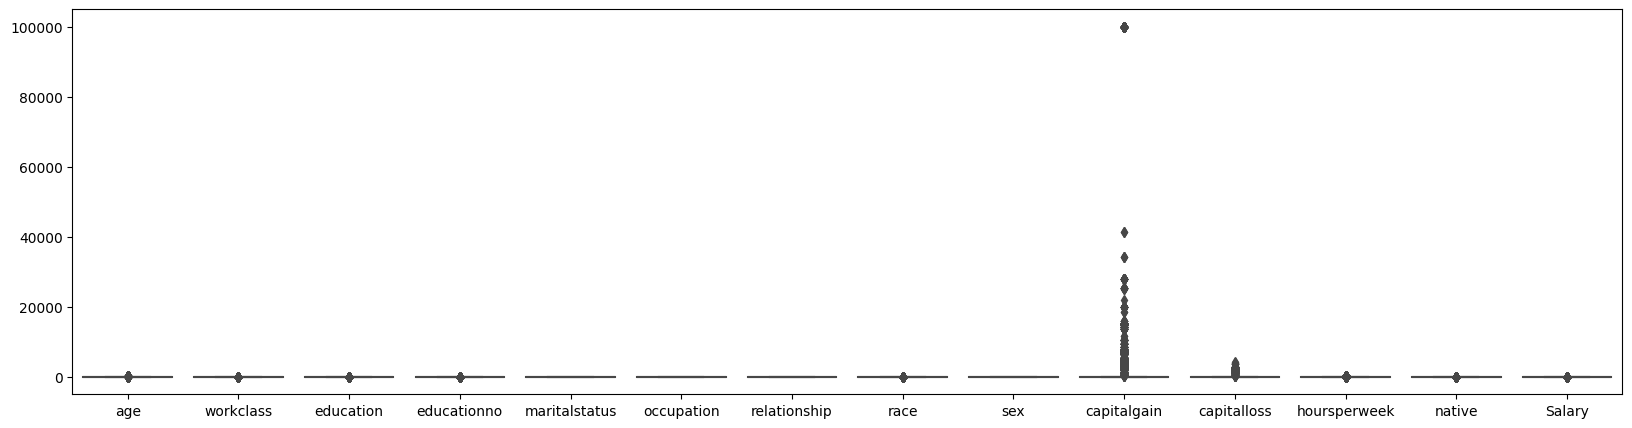

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(data=salary1)

<Axes: >

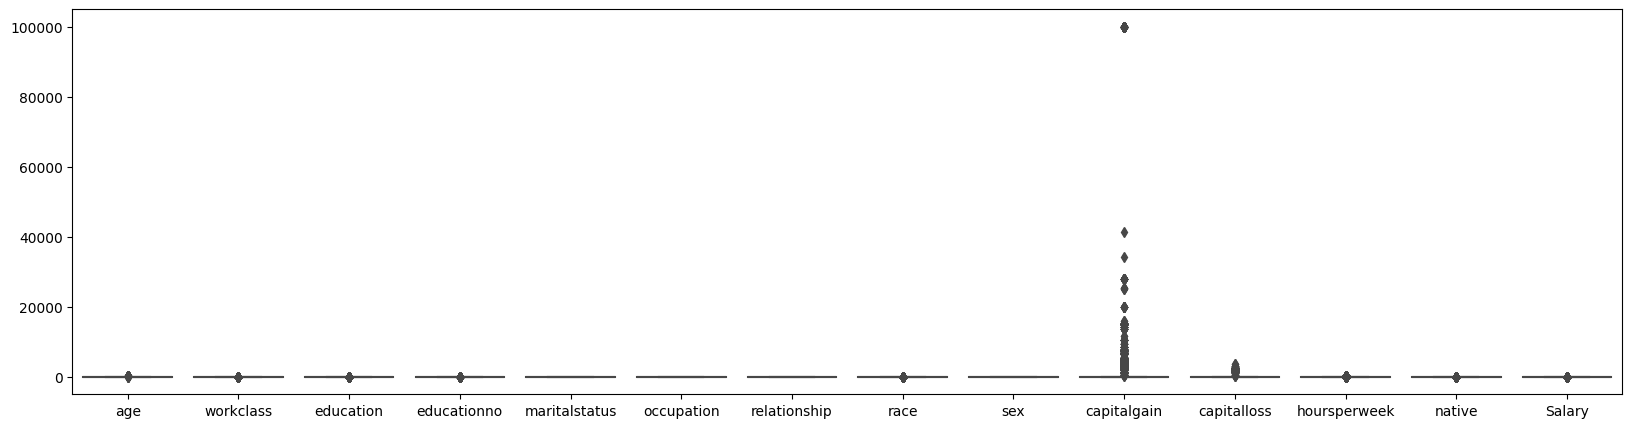

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(data=salary_test1)

<Axes: >

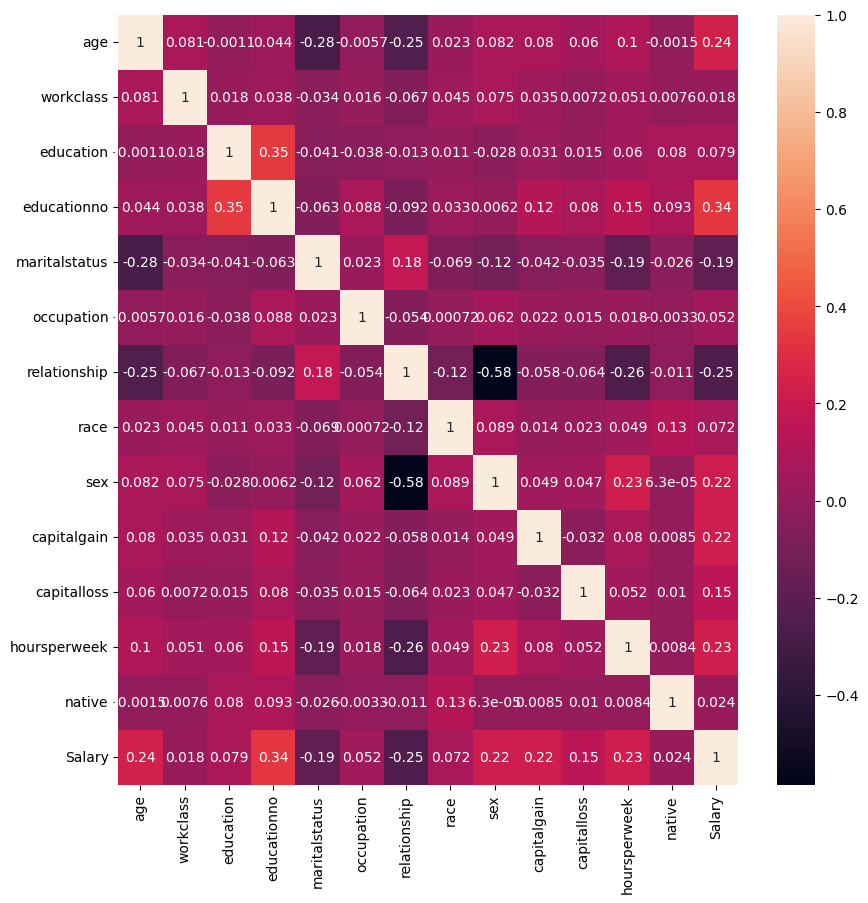

In [ ]:
corr = salary1.corr()


plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)

<Axes: >

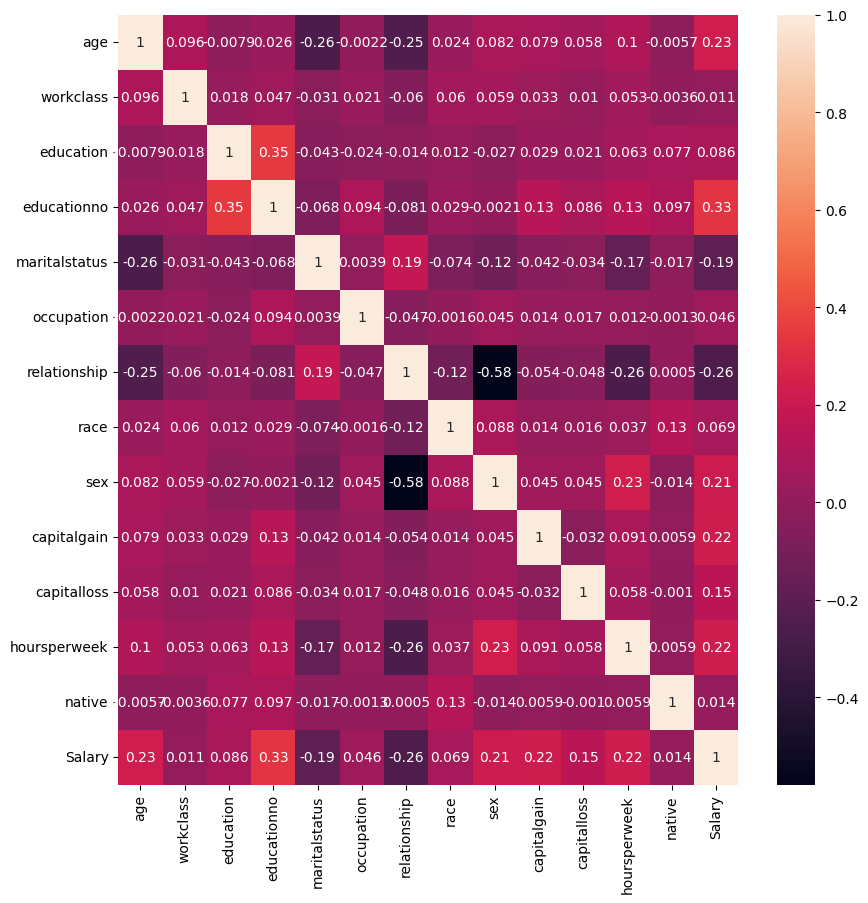

In [ ]:
corr1 = salary_test1.corr()


plt.figure(figsize=(10,10))
sns.heatmap(corr1, annot=True)

In [ ]:
#Salary-Train
x_train = salary1.iloc[:,[0,1,2,4,5,6,7,8,11,12,13]]
y_train = salary1.iloc[:,-1]

In [ ]:
#Salary-Test
x_test = salary_test1.iloc[:,[0,1,2,4,5,6,7,8,11,12,13]]
y_test = salary_test1.iloc[:,-1]

In [ ]:
salary1.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

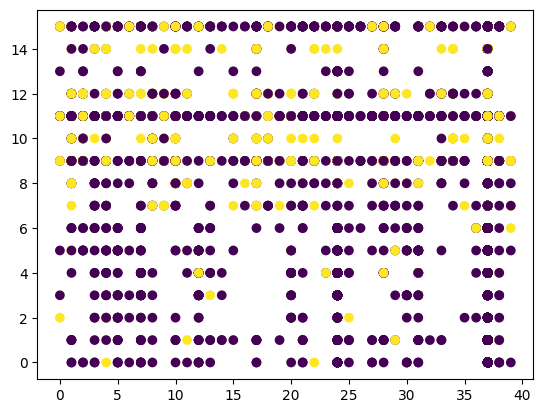

In [ ]:
plt.scatter(salary1['native'],salary1['education'],c=salary1['Salary'])

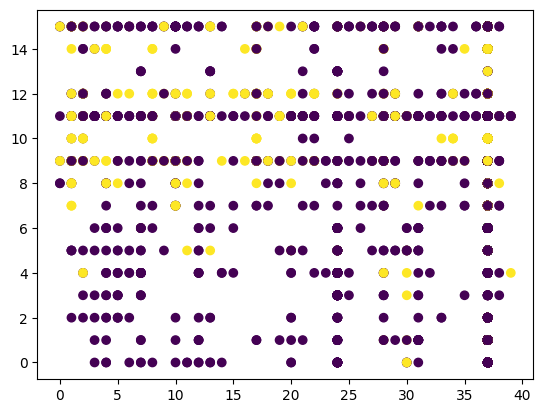

In [ ]:
plt.scatter(salary_test1['native'],salary_test1['education'],c=salary_test1['Salary'])

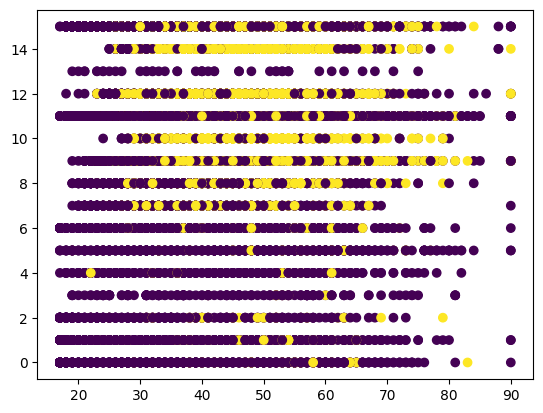

In [ ]:
plt.scatter(salary1['age'],salary1['education'],c=salary1['Salary'])

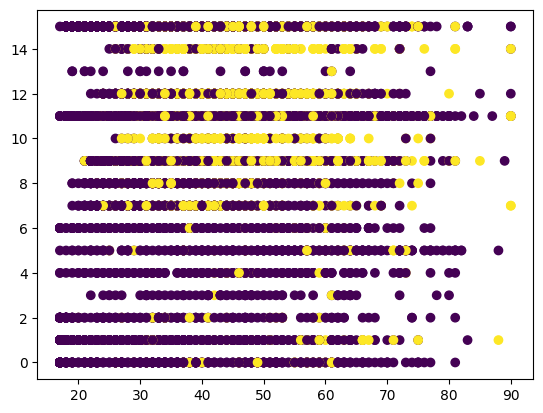

In [ ]:
plt.scatter(salary_test1['age'],salary_test1['education'],c=salary_test1['Salary'])

In [ ]:
clf = SVC(kernel='rbf',gamma=2)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
acc=accuracy_score(y_test,y_pred)*100
print("Accuracy= ",acc)
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_preds are the true labels and predicted labels, respectively
cm = confusion_matrix(y_test, y_pred)
cm

Accuracy=  81.16865869853918


array([[11360,     0],
       [ 2836,   864]])

In [ ]:
clf = SVC(C=1,gamma=2,kernel='rbf') # can change kernel and check accuracy
clf.fit(x_train , y_train) #build model
y_pred = clf.predict(x_test)#predict on test dataset
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 81.16865869853918


array([[11360,     0],
       [ 2836,   864]])